# 5. Self Reactive Sufficiency Figure

In [1]:
import repeated_play

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np

In [4]:
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["font.size"] = 12

plt.rcParams["font.family"] = "Arial"

In [5]:
def default_plot(ax, payoffs=None):
    if payoffs == None:
        R, S, T, P = 3, 0, 5, 1
    else:
        R, S, T, P = payoffs
    # labels of coordinates
    labels = ["(R, R)", "(S, T)", "(P, P)", "(T, S)"]

    # cordinates of corner points
    corner_points_x = [R, S, P, T]
    corner_points_y = [R, T, P, S]

    # lines coordinates
    x1 = [S * (1 - x) + R * x for x in np.linspace(0, 1)]
    y1 = [T * (1 - x) + R * x for x in np.linspace(0, 1)]
    x2 = [S * x + P * (1 - x) for x in np.linspace(0, 1)]
    y2 = [T * x + P * (1 - x) for x in np.linspace(0, 1)]

    # plotting
    ax.scatter(corner_points_x, corner_points_y, color="tab:blue", s=15)

    ax.fill(corner_points_x, corner_points_y, alpha=0.2)

    ax.plot(x1, y1, color="tab:blue")

    ax.plot(y1, x1, color="tab:blue")

    ax.plot(x2, y2, color="tab:blue")

    ax.plot(y2, x2, color="tab:blue")

    for i, txt in enumerate(labels):
        if i < 2:
            ax.annotate(
                txt, (corner_points_x[i] - 0.5, corner_points_y[i] + 0.5)
            )
        else:
            ax.annotate(
                txt, (corner_points_x[i] - 0.5, corner_points_y[i] - 0.5)
            )

    ax.set_ylim(S - 1, T + 1)
    ax.set_xlim(S - 1, T + 1)

    return ax

In [6]:
def match_payoffs(player, coplayer, Sx, Sy, memory="one"):
    M = repeated_play.transition_matrix_repeated_game(
        player, coplayer, memory=memory
    )

    ss = repeated_play.stationary_distribution(M)[0]

    return ss @ Sx, ss @ Sy

## Reactive-1

In [7]:
b, c = 3, 1

Sx = np.array([b - c, -c, b, 0])

Sy = np.array([b - c, b, -c, 0])

In [8]:
np.random.seed(4801)

q_1val, q_2val = np.random.random(2)

q_player = [q_1val, q_2val, q_1val, q_2val]

X, Y = [], []

for _ in range(10**3):
    coplayer = np.random.random(4)

    payoffs_p1, payoffs_p2 = match_payoffs(q_player, coplayer, Sx, Sy)

    X.append(payoffs_p1)
    Y.append(payoffs_p2)

X1, Y1 = [], []

for _ in range(10**3):
    p_1val, p_2val = np.random.random(2)

    p_player = [p_1val, p_2val, p_1val, p_2val]

    payoffs_p1, payoffs_p2 = match_payoffs(q_player, p_player, Sx, Sy)

    X1.append(payoffs_p1)
    Y1.append(payoffs_p2)


X2, Y2 = [], []

for _ in range(10**3):
    p_1val, p_2val = np.random.random(2)

    p_player = [p_1val, p_1val, p_2val, p_2val]

    payoffs_p1, payoffs_p2 = match_payoffs(q_player, p_player, Sx, Sy)

    X2.append(payoffs_p1)
    Y2.append(payoffs_p2)

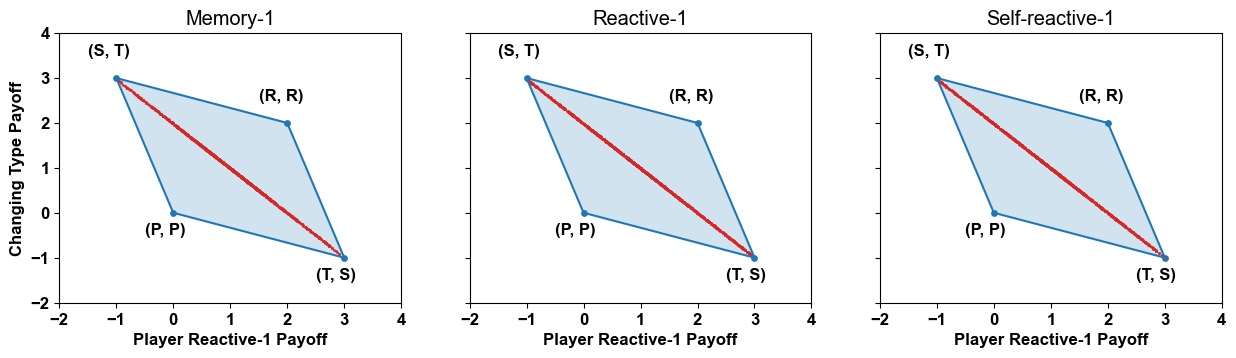

In [9]:
fig, axes = plt.subplots(ncols=3, figsize=(15, 3.5), sharex=True, sharey=True)

for ax in axes:
    ax = default_plot(ax, [b - c, -c, b, 0])
    ax.set_xlabel("Player Reactive-1 Payoff")

axes[0].set_ylabel("Changing Type Payoff")

axes[0].scatter(X, Y, s=1, color="tab:red")
axes[0].set_title("Memory-1")

axes[1].scatter(X1, Y1, s=1, color="tab:red")
axes[1].set_title("Reactive-1")

axes[2].scatter(X2, Y2, s=1, color="tab:red")
axes[2].set_title("Self-reactive-1");

## Reactive-2

In [13]:
np.random.seed(856)

q_1val, q_2val, q_3val, q_4val = np.random.random(4).round(2)

q_player = [
    q_1val,
    q_2val,
    q_1val,
    q_2val,
    q_3val,
    q_4val,
    q_3val,
    q_4val,
    q_1val,
    q_2val,
    q_1val,
    q_2val,
    q_3val,
    q_4val,
    q_3val,
    q_4val,
]

X, Y = [], []

for _ in range(10**5):
    coplayer = np.random.random(16)

    payoffs_p1, payoffs_p2 = match_payoffs(
        q_player, coplayer, Sx, Sy, memory="two"
    )

    X.append(payoffs_p1)
    Y.append(payoffs_p2)

X1, Y1 = [], []

for _ in range(10**3):
    p_1val, p_2val, p_3val, p_4val = np.random.random(4)

    p_player = [
        p_1val,
        p_2val,
        p_1val,
        p_2val,
        p_3val,
        p_4val,
        p_3val,
        p_4val,
        p_1val,
        p_2val,
        p_1val,
        p_2val,
        p_3val,
        p_4val,
        p_3val,
        p_4val,
    ]

    payoffs_p1, payoffs_p2 = match_payoffs(
        q_player, p_player, Sx, Sy, memory="two"
    )

    X1.append(payoffs_p1)
    Y1.append(payoffs_p2)


X2, Y2 = [], []

for _ in range(10**3):
    p1, p2, p3, p4 = np.random.random(4)

    p_player = [p1, p1, p2, p2, p1, p1, p2, p2, p3, p3, p4, p4, p3, p3, p4, p4]

    payoffs_p1, payoffs_p2 = match_payoffs(
        q_player, p_player, Sx, Sy, memory="two"
    )

    X2.append(payoffs_p1)
    Y2.append(payoffs_p2)

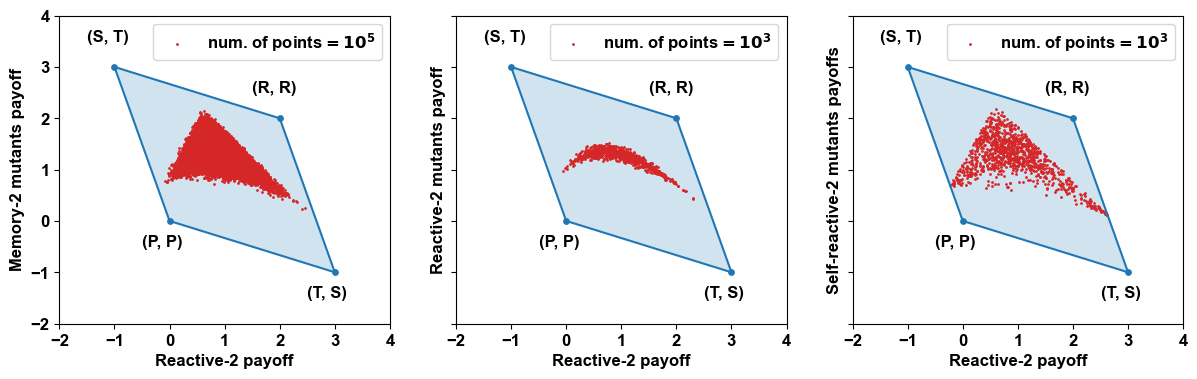

In [14]:
fig, axes = plt.subplots(ncols=3, figsize=(14.5, 4), sharex=True, sharey=True)

for ax in axes:
    ax = default_plot(ax, [b - c, -c, b, 0])
    ax.set_xlabel("Reactive-2 payoff")

axes[0].scatter(X, Y, s=1, color="tab:red", label="num. of points$=10^5$")
axes[0].legend()
axes[0].set_ylabel("Memory-2 mutants payoff")

axes[1].scatter(X1, Y1, s=1, color="tab:red", label="num. of points$=10^3$")
axes[1].legend()
axes[1].set_ylabel("Reactive-2 mutants payoff")

axes[2].scatter(X2, Y2, s=1, color="tab:red", label="num. of points$=10^3$")
axes[2].legend()
axes[2].set_ylabel("Self-reactive-2 mutants payoffs")


fig.savefig(
    "../figures/sufficiency_of_self_reactive_numerical_example_n_2.pdf",
    bbox_inches="tight",
)

For b=3 and c=1. We fix a player p = (0.37, 0.89, 0.95, 0.23). 